In [2]:
import pandas as pd
import os

In [3]:
matchs = pd.read_csv(os.path.join("donnees_football\\Match.csv"))
Team = pd.read_csv(os.path.join("donnees_football\\Team.csv"))

Question 2: Quel est le classement de la Premier League lors de la saison 2015/2016 ? On affichera le nombre de points, la différence de buts et le nombre de buts marqués car il s’agit des trois premiers critères pour déterminer le classement des équipes en cas d’égalité. Ces règles correspondent à celles de la Premier League, mais elles ne sont pas forcément valides pour les autres championnats du jeu de données. (Python + Pandas)

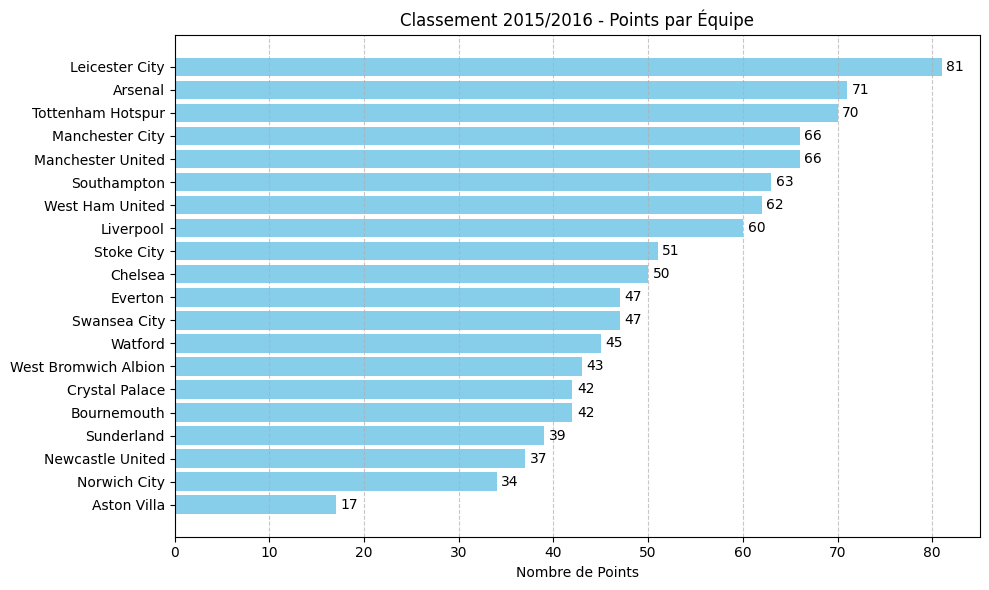

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def afficher_classement_barplot(matchs, team_data, league_id, saison):
    """
    Calcule le classement d'un championnat pour une saison donnée, avec les statistiques suivantes :
    - Points
    - Buts marqués
    - Buts encaissés
    - Différence de buts
    et affiche un barplot du résultat

    Args:
        matchs (DataFrame): Le DataFrame contenant les données des matchs.
        team_data (DataFrame): Le DataFrame contenant les noms des équipes.
        league_id (int): L'identifiant du championnat (ex : 1729 pour la Premier League).
        saison (str): La saison souhaitée (ex : "2015/2016").
    """
    # Filtrage des matchs
    matchs_ligue = matchs[(matchs["league_id"] == league_id) & (matchs["season"] == saison)]
    points = {}
    buts_marqués = {}
    buts_encaissés = {}
    diff_buts = {}

    # Calcul des statistiques
    for _, match in matchs_ligue.iterrows():
        home_id = match["home_team_api_id"]
        away_id = match["away_team_api_id"]
        home_goals = match["home_team_goal"]
        away_goals = match["away_team_goal"]

        for team_id in [home_id, away_id]:
            if team_id not in buts_encaissés:
                buts_encaissés[team_id] = 0
                buts_marqués[team_id] = 0
                points[team_id] = 0

        buts_marqués[home_id] += home_goals
        buts_encaissés[home_id] += away_goals
        buts_marqués[away_id] += away_goals
        buts_encaissés[away_id] += home_goals

        if home_goals > away_goals:
            points[home_id] += 3
        elif away_goals > home_goals:
            points[away_id] += 3
        else:
            points[home_id] += 1
            points[away_id] += 1

    # Calcul de la différence de buts
    for team_id in buts_marqués:
        diff_buts[team_id] = buts_marqués[team_id] - buts_encaissés[team_id]

    # Création du DataFrame
    equipes_du_classement = pd.DataFrame({
        "team_api_id": list(points.keys()),
        "Points": list(points.values()),
        "Différence de buts": [diff_buts[t] for t in points],
        "Buts marqués": [buts_marqués[t] for t in points]
    })

    # Tri du classement
    classement_sans_nom = equipes_du_classement.sort_values(
        by=["Points", "Différence de buts", "Buts marqués"],
        ascending=[False, False, False]
    ).reset_index(drop=True)

    # Associer chaque id à un nom d'équipe
    classement = classement_sans_nom.merge(team_data[["team_api_id", "team_long_name"]],
                                           on="team_api_id",
                                           how="left")

    # Réorganisation des colonnes
    classement = classement[["team_long_name", "Points", "Différence de buts", "Buts marqués"]]
    classement.columns = ["Équipe", "Points", "Différence de buts", "Buts marqués"]

    # Affichage du Bar Plot
    plt.figure(figsize=(10, 6))
    plt.barh(classement["Équipe"], classement["Points"], color='skyblue')
    plt.title(f"Classement {saison} - Points par Équipe")
    plt.xlabel("Nombre de Points")
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Afficher les valeurs sur les barres
    for index, value in enumerate(classement["Points"]):
        plt.text(value + 0.5, index, str(value), va='center')

    plt.tight_layout()
    plt.savefig('question2.png')
    plt.show()

afficher_classement_barplot(matchs, Team, 1729, "2015/2016")


Question 10: Quel est la moyenne du nombre de buts par match pour chaque championnat lors de la saison 2015/2016 ?(Python pur)

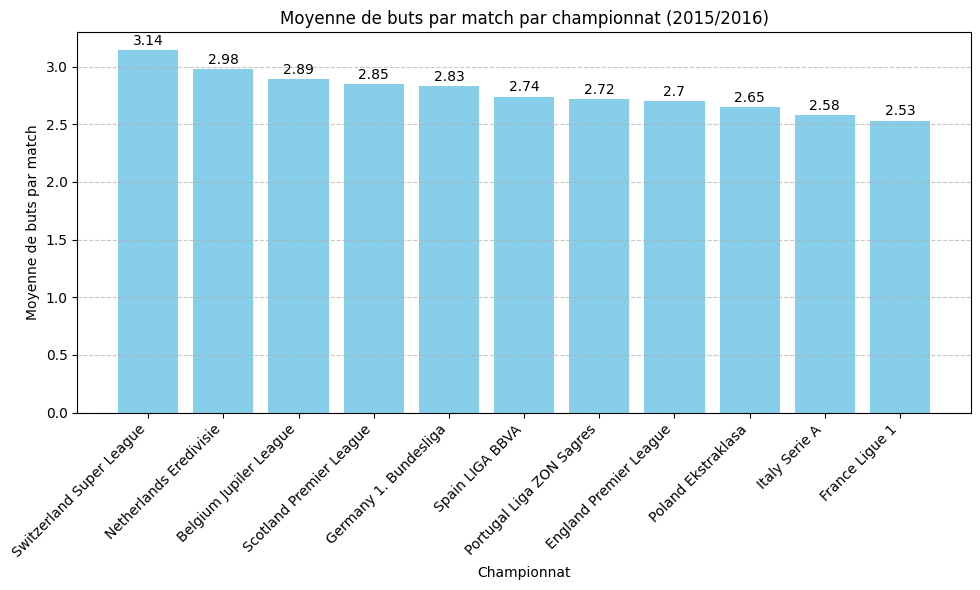

In [ ]:
import os
import matplotlib.pyplot as plt

def afficher_moyenne_buts_par_championnat(saison="2015/2016"):
    """
    Charge les données de matchs et de championnats, calcule la moyenne de buts par match
    pour chaque championnat pour une saison donnée, puis affiche un barplot.

    Args:
        saison (str): La saison souhaitée (par défaut "2015/2016").
    """

    # --- Étape 1 : Charger les données ---
    # Chargement des données de Match.csv
    with open(os.path.join("donnees_football", "Match.csv")) as data:
        matchs = []
        intitules = data.readline().strip('\n').split(',')
        for ligne in data:
            infos = ligne.strip('\n').split(',')
            matchs.append(infos)

    # --- Étape 2 : Filtrer les matchs de la saison ---
    idx_season = intitules.index("season")
    matchs_saison = [match for match in matchs if len(match) > idx_season and match[idx_season] == saison]

    # --- Étape 3 : Calcul du nombre de buts et de matchs par championnat ---
    nb_but = {}  # nombre de buts par championnat
    nb_match = {}  # nombre de matchs par championnat
    buts_par_match = {}

    idx_home_goal = intitules.index("home_team_goal")
    idx_away_goal = intitules.index("away_team_goal")
    idx_league = intitules.index("league_id")

    for match in matchs_saison:
        league_id = match[idx_league]

        if league_id not in nb_but:
            nb_but[league_id] = 0
            nb_match[league_id] = 0

        but = int(match[idx_away_goal]) + int(match[idx_home_goal])
        nb_but[league_id] += but
        nb_match[league_id] += 1

        # Calcul de la moyenne de buts par match
        buts_par_match[league_id] = round(nb_but[league_id] / nb_match[league_id], 2)

    # --- Étape 4 : Associer les identifiants aux noms de championnats ---
    with open(os.path.join("donnees_football", "League.csv")) as data:
        league = []
        intitules = data.readline().strip('\n').split(',')
        for ligne in data:
            infos = ligne.strip('\n').split(',')
            league.append(infos)

    idx_id = intitules.index("id")
    idx_name = intitules.index("name")

    league_names = {ligue[idx_id]: ligue[idx_name] for ligue in league}

    # Création d'un dictionnaire avec les noms de championnats et leurs moyennes de buts
    moyenne_par_match = {
        league_names.get(league_id, f"Ligue {league_id}"): moyenne
        for league_id, moyenne in buts_par_match.items()
    }

    # --- Étape 5 : Visualiser les résultats ---
    moyenne_triee = dict(sorted(moyenne_par_match.items(), key=lambda item: item[1], reverse=True))

    plt.figure(figsize=(10, 6))
    plt.bar(moyenne_triee.keys(), moyenne_triee.values(), color='skyblue')

    plt.title(f"Moyenne de buts par match par championnat ({saison})")
    plt.xlabel("Championnat")
    plt.ylabel("Moyenne de buts par match")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Afficher les valeurs sur les barres
    for i, v in enumerate(moyenne_triee.values()):
        plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')

    plt.tight_layout()
    plt.savefig('question10.png')
    plt.show()


afficher_moyenne_buts_par_championnat()


Question 3 : Comment a évolué le classement de la meilleure équipe de la Premier League (trouvée à la question précédente) entre 2015 et 2016 ?

In [4]:
matchs_premier_league = matchs[matchs["league_id"] == 1729]
def calculer_classements_par_saison(matchs_premier_league, team_data):
    """
    Calcule le classement des équipes de Premier League pour chaque saison,
    avec les statistiques suivantes :
    - Points
    - Buts marqués
    - Buts encaissés
    - Différence de buts

    Arguments:
        matchs_premier_league (DataFrame): Le DataFrame contenant les données des matchs de Premier League.
        team_data (DataFrame): Le DataFrame contenant les noms des équipes.

    Returns:
        DataFrame: Un DataFrame contenant le classement global pour toutes les saisons.
    """
    classements_saisons = []

    # Récupérer toutes les saisons uniques
    for saison in set(matchs_premier_league["season"]):
        points = {}
        buts_marqués = {}
        buts_encaissés = {}
        diff_buts = {}

        matchs_saison = matchs_premier_league[matchs_premier_league["season"] == saison]

        for _, match in matchs_saison.iterrows():
            home_id = match["home_team_api_id"]
            away_id = match["away_team_api_id"]
            home_goals = match["home_team_goal"]
            away_goals = match["away_team_goal"]

            for team_id in [home_id, away_id]:
                if team_id not in points:
                    points[team_id] = 0
                    buts_marqués[team_id] = 0
                    buts_encaissés[team_id] = 0

            buts_marqués[home_id] += home_goals
            buts_encaissés[home_id] += away_goals
            buts_marqués[away_id] += away_goals
            buts_encaissés[away_id] += home_goals

            if home_goals > away_goals:
                points[home_id] += 3
            elif away_goals > home_goals:
                points[away_id] += 3
            else:
                points[home_id] += 1
                points[away_id] += 1

        for team_id in points:
            diff_buts[team_id] = buts_marqués[team_id] - buts_encaissés[team_id]

        classement = pd.DataFrame({
            "team_api_id": list(points.keys()),
            "nb_points": list(points.values()),
            "buts_marqués": [buts_marqués[t] for t in points],
            "buts_encaissés": [buts_encaissés[t] for t in points],
            "diff_buts": [diff_buts[t] for t in points],
            "season": saison
        })

        classement = classement.sort_values(
            by=["nb_points", "diff_buts", "buts_marqués"],
            ascending=[False, False, False]
        ).reset_index(drop=True)

        classement = classement.merge(team_data[["team_api_id", "team_long_name"]],
                                      on="team_api_id",
                                      how="left")

        classements_saisons.append(classement)

    liste_classement = pd.concat(classements_saisons, ignore_index=True)
    liste_classement = liste_classement[[
        "team_long_name",
        "nb_points",
        "diff_buts",
        "buts_marqués",
        "team_api_id",
        "season"
    ]]

    return liste_classement

calculer_classements_par_saison(matchs_premier_league, Team)

def recuperer_position_par_saison(classements, team_name):
    """
    Récupère la position d'une équipe dans le classement pour chaque saison.

    Args:
        classements (DataFrame): Le DataFrame contenant les classements de chaque saison.
        team_name (str): Le nom de l'équipe à rechercher.

    Returns:
        DataFrame: Un DataFrame contenant la position de l'équipe pour chaque saison.
    """
    # Filtrer les classements pour l'équipe spécifiée
    equipe_classements = classements[classements["team_long_name"] == team_name].copy()

    # Ajouter un rang basé sur le classement (index + 1 pour avoir un rang à partir de 1)
    equipe_classements["position"] = equipe_classements.groupby("season").cumcount() + 1

    # Garder uniquement les colonnes pertinentes
    result = equipe_classements[["season", "position"]].sort_values(by="season").reset_index(drop=True)
    
    result.to_csv('question3.csv', index=False)
    
    return result

recuperer_position_par_saison(calculer_classements_par_saison(matchs_premier_league, Team), "Leicester City")

,season,position
0,2014/2015,1
1,2015/2016,1
